In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [6]:
df = pd.read_csv("train.csv")
print("✅ Data Loaded Successfully!")
df.head()


✅ Data Loaded Successfully!


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0


In [7]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Aggregate total sales per date
daily_sales = df.groupby('date')['sales'].sum().reset_index()
daily_sales.head()


,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229


In [8]:
# Compute 7-day (weekly) and 30-day (monthly) moving averages
daily_sales['7_day_MA'] = daily_sales['sales'].rolling(window=7).mean()
daily_sales['30_day_MA'] = daily_sales['sales'].rolling(window=30).mean()
daily_sales.tail()


,date,sales,7_day_MA,30_day_MA
11,2013-01-12,403258.212011,346953.527042,NaN
12,2013-01-13,464638.547998,339088.262315,NaN
13,2013-01-14,293348.362078,332977.628174,NaN
14,2013-01-15,299129.549954,330232.167027,NaN
15,2013-01-16,105721.837992,302116.599738,NaN


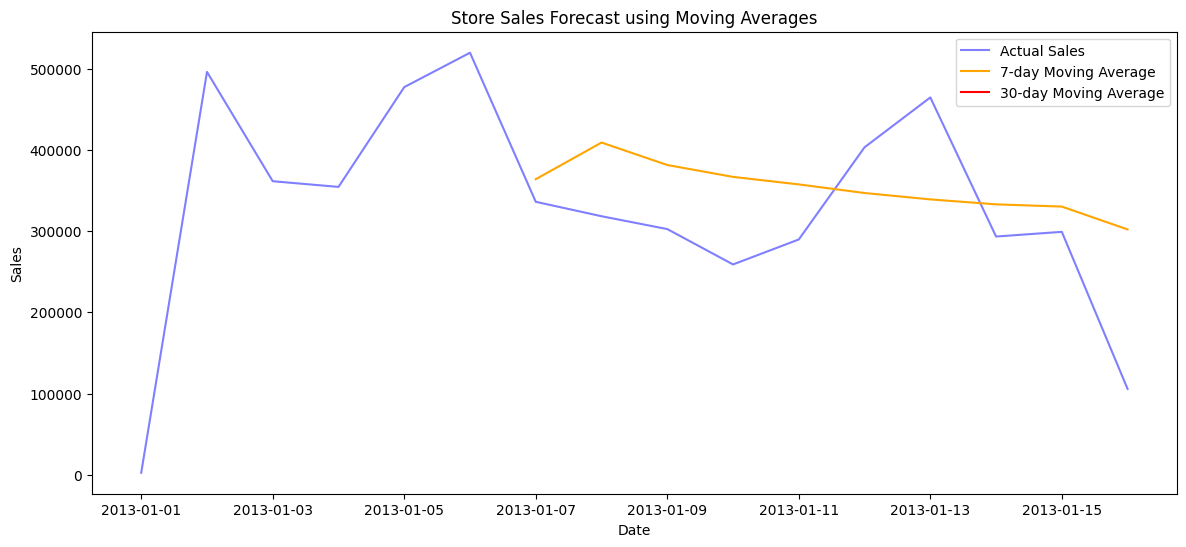

In [9]:
plt.figure(figsize=(14,6))
plt.plot(daily_sales['date'], daily_sales['sales'], label='Actual Sales', color='blue', alpha=0.5)
plt.plot(daily_sales['date'], daily_sales['7_day_MA'], label='7-day Moving Average', color='orange')
plt.plot(daily_sales['date'], daily_sales['30_day_MA'], label='30-day Moving Average', color='red')
plt.title("Store Sales Forecast using Moving Averages")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [10]:
# Forecast = shift moving average by one day
daily_sales['Forecast_7day'] = daily_sales['7_day_MA'].shift(1)

# Drop missing values
comparison = daily_sales.dropna(subset=['Forecast_7day'])

# Calculate accuracy metrics
mae = mean_absolute_error(comparison['sales'], comparison['Forecast_7day'])
mse = mean_squared_error(comparison['sales'], comparison['Forecast_7day'])
rmse = mse ** 0.5

print("📊 Forecast Accuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


📊 Forecast Accuracy Metrics:
Mean Absolute Error (MAE): 91016.12
Mean Squared Error (MSE): 11549213623.56
Root Mean Squared Error (RMSE): 107467.27


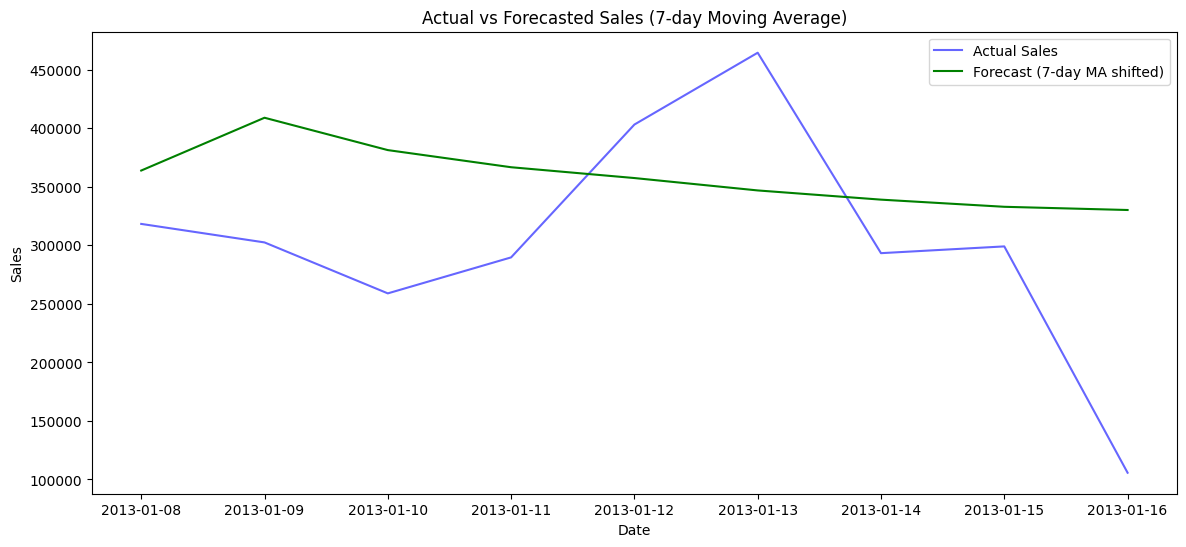

In [11]:
plt.figure(figsize=(14,6))
plt.plot(comparison['date'], comparison['sales'], label='Actual Sales', color='blue', alpha=0.6)
plt.plot(comparison['date'], comparison['Forecast_7day'], label='Forecast (7-day MA shifted)', color='green')
plt.title("Actual vs Forecasted Sales (7-day Moving Average)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()
